In [1]:
from pymongo import MongoClient
import os
from pathlib import Path
import pandas as pd

In [2]:
BASE_DIR = Path(os.path.abspath('')).resolve()

### Get Dataset


In [3]:
dfSentencas = pd.read_parquet(Path(os.path.join(BASE_DIR,'dataset', 'processed','legislacao_base_sentencas.parquet')), engine='fastparquet')
dfSentencas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7182 entries, 0 to 7181
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   path                 7182 non-null   object 
 1   id_doc_base          7182 non-null   object 
 2   name                 7182 non-null   object 
 3   esfera               7182 non-null   object 
 4   cat                  7182 non-null   object 
 5   ementa               7182 non-null   object 
 6   id_sentenca          7181 non-null   object 
 7   ordem                7181 non-null   float64
 8   tokens_total         7181 non-null   float64
 9   tokens_no_stopwords  7181 non-null   float64
 10  cat_sentenca         7181 non-null   object 
 11  text_sentenca        7181 non-null   object 
dtypes: float64(3), object(9)
memory usage: 729.4+ KB


In [4]:
dfTS = dfSentencas[dfSentencas['cat']=='terceiro_setor']
dfTS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   path                 1085 non-null   object 
 1   id_doc_base          1085 non-null   object 
 2   name                 1085 non-null   object 
 3   esfera               1085 non-null   object 
 4   cat                  1085 non-null   object 
 5   ementa               1085 non-null   object 
 6   id_sentenca          1084 non-null   object 
 7   ordem                1084 non-null   float64
 8   tokens_total         1084 non-null   float64
 9   tokens_no_stopwords  1084 non-null   float64
 10  cat_sentenca         1084 non-null   object 
 11  text_sentenca        1084 non-null   object 
dtypes: float64(3), object(9)
memory usage: 110.2+ KB


In [5]:
listaDfDocs = []
nrDocs = 2500

##Gerar docs
for i in range(0,nrDocs):
    
    maxIteration = 10
    totalToken = 0
    nrIteration = 0
    dfText = pd.DataFrame()
    
    while totalToken < 512:
        
        dfSample = dfTS.sample(replace=False)
        dfSample_tokens_total = dfSample["tokens_no_stopwords"].iloc[0]
        dfText = pd.concat([dfText,dfSample])
        
        totalToken = totalToken + dfSample_tokens_total

        if(nrIteration > maxIteration):
            break
        
        nrIteration = nrIteration + 1

    listaDfDocs.append(dfText)


In [6]:
listaIdDocBase = []
listaIdSentenca = []
for dfTextProc in listaDfDocs:
    for index,row in dfTextProc.iterrows():
        listaIdDocBase.append(row["id_doc_base"])
        listaIdSentenca.append(row["id_sentenca"])
        

In [7]:
countDocBase = [[x,listaIdDocBase.count(x)] for x in set(listaIdDocBase)]
countSentenca = [[x,listaIdSentenca.count(x)] for x in set(listaIdSentenca)]

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

<AxesSubplot:ylabel='Count'>

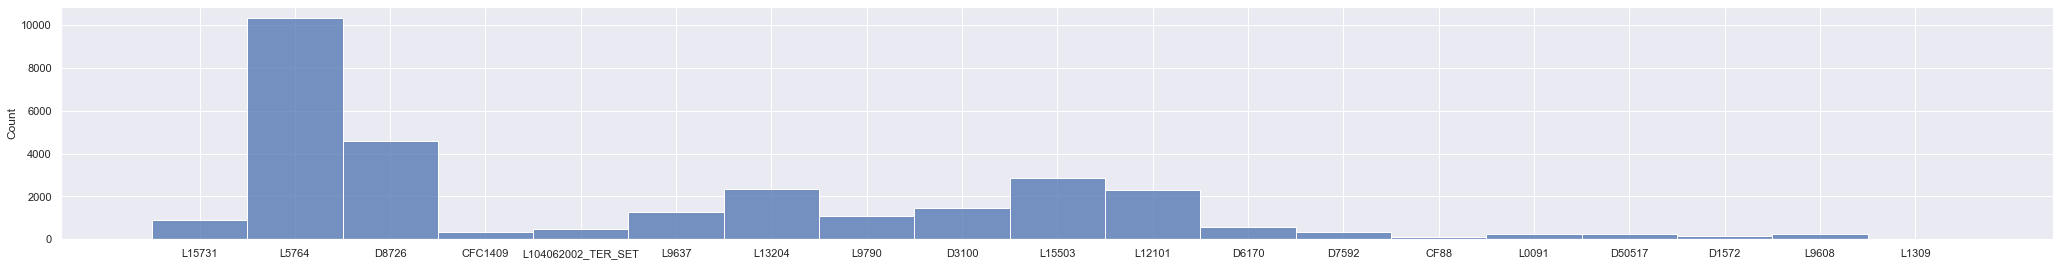

In [17]:
sns.set(rc={'figure.figsize':(35.7,4.27)})
sns.histplot(data=listaIdDocBase, discrete=True)

<AxesSubplot:ylabel='Count'>

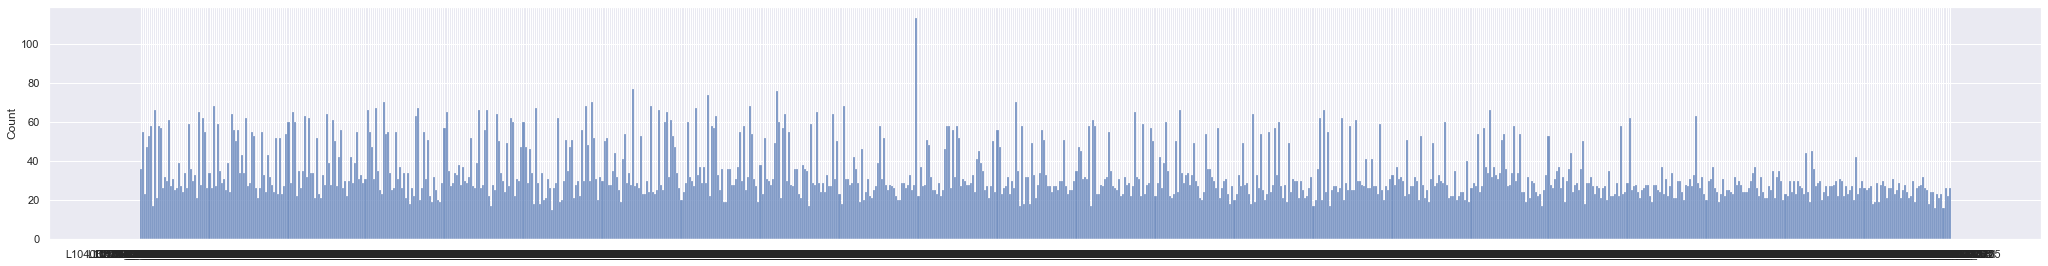

In [18]:
sns.set(rc={'figure.figsize':(35.7,4.27)})
sns.histplot(data=listaIdSentenca, discrete=True)

In [58]:
dfTreino = pd.DataFrame()

for dfTextProc in listaDfDocs:
    txtList = dfTextProc["text_sentenca"].to_list()

    ##Drop None
    txtList = [x for x in txtList if x is not None]
    
    try:
        txt = ' '.join(txtList)
    except Exception as e:
        print(e, txtList)

    reg = {  "cat":"terceiro_setor"
            ,"text":txt
        }
        
    dfTreino = pd.concat([dfTreino,pd.DataFrame([reg])])
    
  

In [59]:
dfTreino.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 0 to 0
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cat     2500 non-null   object
 1   text    2500 non-null   object
dtypes: object(2)
memory usage: 58.6+ KB


In [61]:
dfTreino.head(2)

,cat,text
0,terceiro_setor,"Para os efeitos desta Lei, considera-se sem fi..."
0,terceiro_setor,III C) A ENTIDADE BENEFICIÁRIA DEVERÁ SER ORGA...


### Gerar Outras Categorias

In [62]:
dfOutros = dfSentencas[dfSentencas['cat']!='terceiro_setor']
dfOutros.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6097 entries, 1085 to 7181
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   path                 6097 non-null   object 
 1   id_doc_base          6097 non-null   object 
 2   name                 6097 non-null   object 
 3   esfera               6097 non-null   object 
 4   cat                  6097 non-null   object 
 5   ementa               6097 non-null   object 
 6   id_sentenca          6097 non-null   object 
 7   ordem                6097 non-null   float64
 8   tokens_total         6097 non-null   float64
 9   tokens_no_stopwords  6097 non-null   float64
 10  cat_sentenca         6097 non-null   object 
 11  text_sentenca        6097 non-null   object 
dtypes: float64(3), object(9)
memory usage: 619.2+ KB


In [63]:
listaDfDocs = []
nrDocs = 2500
##Gerar docs
for i in range(0,nrDocs):
    
    maxIteration = 10
    totalToken = 0
    nrIteration = 0
    dfText = pd.DataFrame()
    
    while totalToken < 512:
        
        dfSample = dfOutros.sample(replace=False)
        dfSample_tokens_total = dfSample["tokens_no_stopwords"].iloc[0]
        dfText = pd.concat([dfText,dfSample])
        
        totalToken = totalToken + dfSample_tokens_total

        if(nrIteration > maxIteration):
            break
        
        nrIteration = nrIteration + 1

    listaDfDocs.append(dfText)


In [65]:
listaIdDocBase = []
listaIdSentenca = []
for dfTextProc in listaDfDocs:
    for index,row in dfTextProc.iterrows():
        listaIdDocBase.append(row["id_doc_base"])
        listaIdSentenca.append(row["id_sentenca"])
        

In [66]:
countDocBase = [[x,listaIdDocBase.count(x)] for x in set(listaIdDocBase)]
countSentenca = [[x,listaIdSentenca.count(x)] for x in set(listaIdSentenca)]

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

<AxesSubplot:ylabel='Count'>

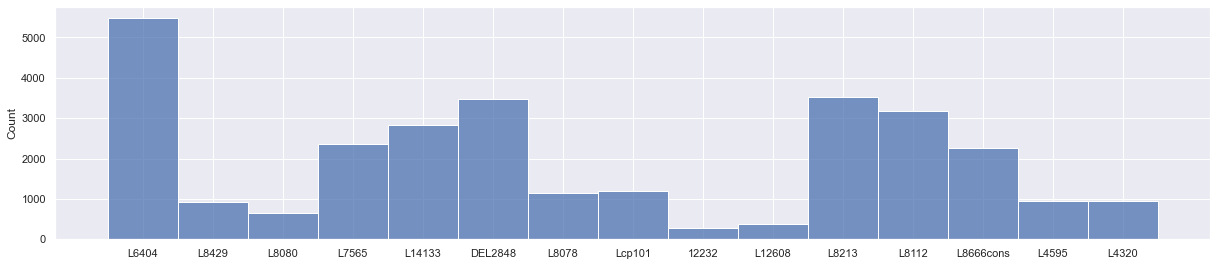

In [72]:
sns.set(rc={'figure.figsize':(20.7,4.27)})
sns.histplot(data=listaIdDocBase, discrete=True)

In [75]:
for dfTextProc in listaDfDocs:
    txtList = dfTextProc["text_sentenca"].to_list()
    txt = ' '.join(txtList)
    
    ##Drop None
    txtList = [x for x in txtList if x is not None]

    reg = {  "cat":"outros"
             ,"text":txt
          }
        
    dfTreino = pd.concat([dfTreino,pd.DataFrame([reg])])
  

In [76]:
dfTreino.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 0
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cat     5000 non-null   object
 1   text    5000 non-null   object
dtypes: object(2)
memory usage: 117.2+ KB


In [77]:

## Saving dataset
dfTreino.to_parquet(Path(os.path.join(BASE_DIR,'dataset', 'processed','dataset_treino.parquet')), engine='fastparquet')